# 2. Прямые методы решения линейных систем

* Работу выпонил:
**Козинов Алексей**
* Группа:
**794**
* Вариант:
**1**

## 2.1 Метод Гаусса с выбором главного элемента по столбцу

### Описание

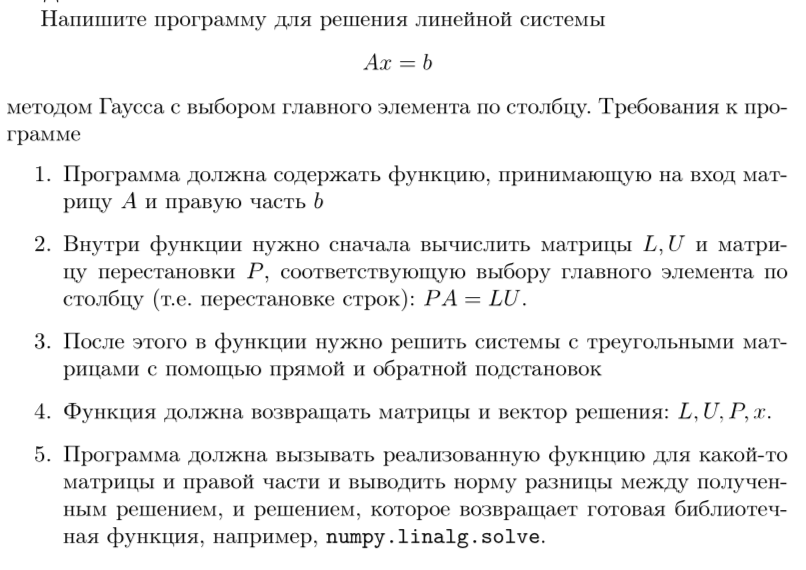

### Решение

* Подключаем библиотеки:

In [5]:
import numpy as np

* Реализуем функцию, которая выполняет поиск $LU$-разложение с выбором ведущего элемента

In [70]:
def solve_LU(A):
    assert A.shape == A.T.shape
    n = A.shape[0]
    
    U = A.copy()
    L = np.eye(n)
    P = np.eye(n)
    
    for k in range(0, n - 1):
        i = np.absolute(U[k:, k]).argmax()
        U[[k + i, k], :] = U[[k + i, k], :]
        L[[k + i, k], :] = L[[k + i, k], :]
        P[[k + i, k], :] = P[[k + i, k], :]
        
        for j in range(k + 1, n):
            L[j, k] = U[j, k] / U[k, k]
            U[j] = U[j] - L[j, k] * U[k]
        
    return L, U, P

* Функция, которая решает систему методом прямой подстановки

In [71]:
def get_L_solution(L, b):
    y = np.zeros(L.shape[0])
    
    for k in range(L.shape[0]):
            y[k] = (b[k] - (y[:k] * L[k, :k]).sum()) / L[k, k]
        
    return y

In [72]:
get_U_solution(np.eye(3), np.ones(3))

array([1., 1., 1.])

* Функция, которая решает систему методом обратной подстановки

In [73]:
def get_U_solution(U, y):
    x = np.zeros(U.shape[0])

    for k in range(U.shape[0] - 1, -1, -1):
            x[k] = (y[k] - (x[k + 1:] * U[k, k + 1:]).sum()) / U[k, k]
         
    return x

* Финальная функция. Решение системы

Для решениня сделаем следующие преобразования:

$Ax = ba$

$PAx = Pb$

$LUx = Pb$

Получим:

Прямая подстановка - $Ly = Pb$

Обратная подстановка - $Ux = y$

In [74]:
def solve(A, x):
    L, U, P = solve_LU(A)
    
    y = get_L_solution(L, P @ b)
    x = get_U_solution(U, y)
    
    return L, U, P, x

* **Проверка** решения

In [79]:
for i in range(10):
    A = np.random.rand(3, 3) + np.eye(3)
    b = np.random.rand(3)

    L, U, P, x = solve(A, b)
    x_gt = np.linalg.solve(A, b)

    assert ((x - x_gt) ** 2).sum() < 1e-22

print('All test passed. Our function is working!')

All test passed. Our function is working!
